In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [ ]:
covid_df = pd.read_csv('state_level_daily.csv')
covid_df.head(10)

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
0,0,01-Apr-20,AN,0,0,0,Andaman and Nicobar Islands
1,1,01-Apr-20,AP,67,0,1,Andhra Pradesh
2,2,01-Apr-20,AR,0,0,0,Arunachal Pradesh
3,3,01-Apr-20,AS,15,0,0,Assam
4,4,01-Apr-20,BR,3,0,0,Bihar
5,5,01-Apr-20,CH,2,0,0,Chandigarh
6,6,01-Apr-20,CT,0,0,0,Chhattisgarh
7,7,01-Apr-20,DD,0,0,0,Daman and Diu
8,8,01-Apr-20,DL,32,0,0,Delhi
9,9,01-Apr-20,DN,0,0,0,Dadra and Nagar Haveli and Daman and Diu


In [ ]:
covid_df.info()
covid_df.shape
covid_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5694 entries, 0 to 5693
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5694 non-null   int64 
 1   Date        5694 non-null   object
 2   State       5694 non-null   object
 3   Confirmed   5694 non-null   int64 
 4   Deceased    5694 non-null   int64 
 5   Recovered   5694 non-null   int64 
 6   State_Name  5694 non-null   object
dtypes: int64(4), object(3)
memory usage: 311.5+ KB


,Unnamed: 0,Confirmed,Deceased,Recovered
count,5694.000000,5694.000000,5694.000000,5694.000000
mean,2846.500000,709.546716,14.589919,481.645241
std,1643.860548,3569.190577,72.889425,2605.743880
min,0.000000,-1295.000000,-3.000000,-19.000000
25%,1423.250000,0.000000,0.000000,0.000000
50%,2846.500000,20.000000,0.000000,5.000000
75%,4269.750000,212.000000,3.000000,116.750000
max,5693.000000,62170.000000,2004.000000,51368.000000


In [ ]:
#active cases
covid_df['Active_cases'] = covid_df['Confirmed'] - (covid_df['Recovered'] + covid_df['Deceased'])
covid_df.tail()


,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name,Active_cases
5689,5689,31-May-20,TT,8789,222,4928,Total,3639
5690,5690,31-May-20,UN,448,0,0,State Unassigned,448
5691,5691,31-May-20,UP,374,4,192,Uttar Pradesh,178
5692,5692,31-May-20,UT,158,0,0,Uttarakhand,158
5693,5693,31-May-20,WB,371,8,187,West Bengal,176


In [ ]:
statewise = pd.pivot_table(covid_df, values = ["Confirmed", "Deceased", "Recovered"],
                           index = "State_Name", aggfunc = max)

In [ ]:
statewise["Recovery_Rate"] = statewise["Recovered"]*100/statewise["Confirmed"]

In [ ]:
statewise["Mortality_Rate"] = statewise["Deceased"]*100/statewise["Confirmed"]

In [ ]:
statewise = statewise.sort_values(by = "Confirmed", ascending = False )

In [ ]:
statewise.style.background_gradient(cmap = "cubehelix")

,Confirmed,Deceased,Recovered,Recovery_Rate,Mortality_Rate
State_Name,,,,,
Total,62170,2004,51368,82.625060,3.223420
Maharashtra,11514,1409,12326,107.052284,12.237276
Andhra Pradesh,10376,77,12750,122.879722,0.742097
Tamil Nadu,6993,518,7758,110.939511,7.407407
Karnataka,6805,115,6772,99.515062,1.689934
Uttar Pradesh,4586,61,3287,71.674662,1.330135
Delhi,3947,437,7725,195.718267,11.071700
Bihar,3521,20,2252,63.959103,0.568020
West Bengal,2954,74,2213,74.915369,2.505078


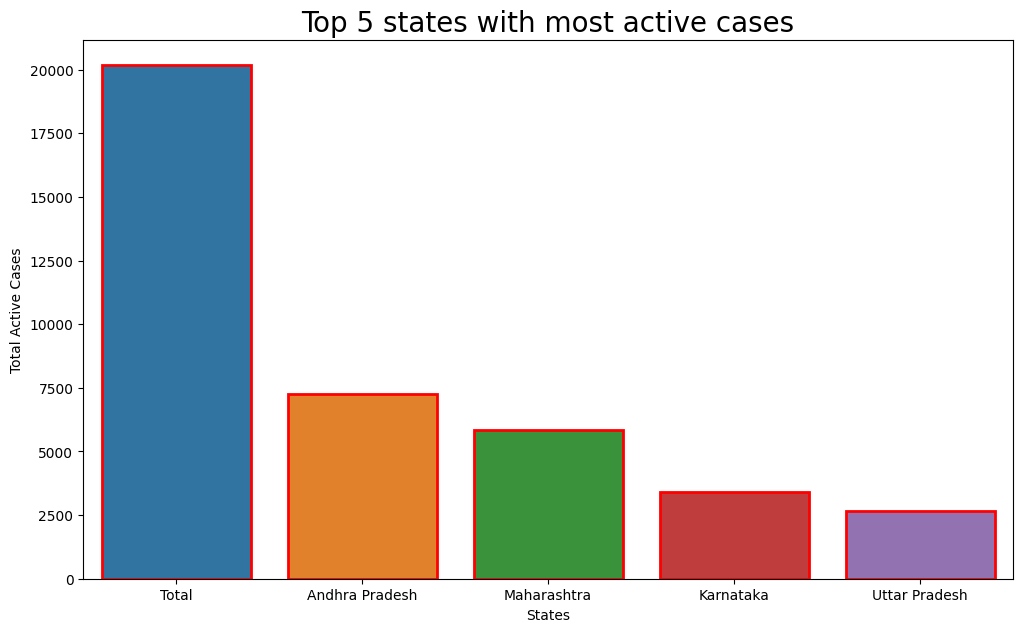

In [ ]:
#Top 5 active cases stores
top_5_active_cases = covid_df.groupby(by = 'State_Name').max()[['Active_cases', 'Date']].sort_values(by = ['Active_cases'],
                                                                                                      ascending = False).reset_index()
fig = plt.figure(figsize = (12,7))
plt.title("Top 5 states with most active cases", size = 20)
ax = sns.barplot(data = top_5_active_cases.iloc[:5], y ="Active_cases", x = "State_Name", linewidth = 2, edgecolor = 'red')
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

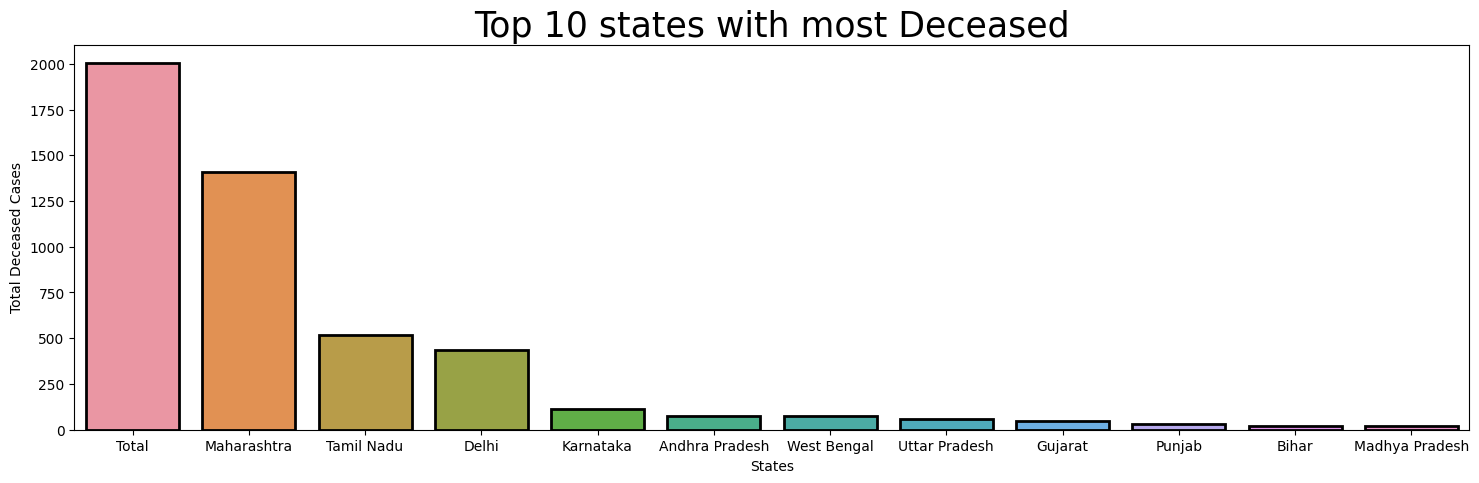

In [ ]:
#Top states with higest deaths
top_10_deceased = covid_df.groupby(by = 'State_Name').max()[['Deceased', 'Date']].sort_values(by = ['Deceased'], ascending = False).reset_index()
fig = plt.figure(figsize = (18,5))
plt.title("Top 10 states with most Deceased", size = 25)
ax = sns.barplot(data = top_10_deceased.iloc[:12], y = 'Deceased', x = 'State_Name', linewidth = 2, edgecolor = 'black')
plt.xlabel('States')
plt.ylabel('Total Deceased Cases')
plt.show()

Text(0.5, 1.0, 'Top 3 effected states in here')

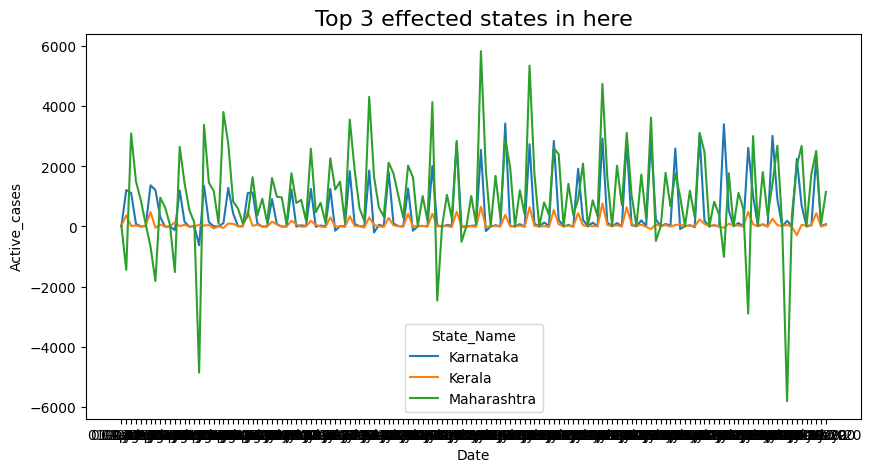

In [ ]:
#Growth Trend
fig = plt.figure(figsize = (10,5))
ax = sns.lineplot(data = covid_df[covid_df['State_Name'].isin(['Maharashtra','Karnataka', 'Kerala'])],x = 'Date',  y = 'Active_cases', hue = 'State_Name')
ax.set_title("Top 3 effected states in here", size = 16)

In [ ]:
vaccine_df = pd.read_csv('covid_vaccine_statewise.csv')
vaccine_df.head(10)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [ ]:
vaccine_df.rename (columns = {'Updated On' : 'Vaccine Date'}, inplace = True)
vaccine_df.head(10)

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [ ]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [ ]:
vaccine_df.shape
vaccine_df.isnull().sum()

Vaccine Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [ ]:
vaccination = vaccine_df.drop(columns = ['45-60 Years (Doses Administered)','60+ Years (Doses Administered)']);


In [ ]:
vaccination.head(10)

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0
